### データ理解

In [58]:
classes = {
    0 : 'L',
    1 : 'O',
    2 : 'V',
    3 : 'E',
}
classes

{0: 'L', 1: 'O', 2: 'V', 3: 'E'}

In [59]:
import tensorflow as tf

x_train = tf.constant(
    [
        [
            [1, 0, 0, 0, 0],
            [1, 0, 0, 0, 0],
            [1, 0, 0, 0, 0],
            [1, 0, 0, 0, 0],
            [1, 1, 1, 1, 1],
        ],
        [
            [1, 1, 1, 1, 1],
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [1, 1, 1, 1, 1],
        ],
        [
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [0, 1, 1, 1, 0],
            [0, 0, 1, 0, 0],
        ],
        [
            [1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0],
            [1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0],
            [1, 1, 1, 1, 1],
        ],
    ]
)

In [60]:
x_train.shape

TensorShape([4, 5, 5])

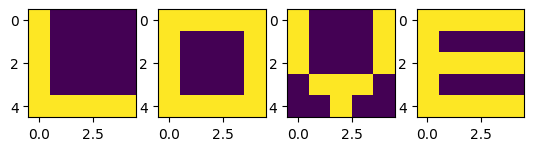

In [61]:
import matplotlib.pyplot as plt

words = x_train.shape[0]

for i in range(words):
    plt.subplot(1, words, i+1)
    plt.imshow(x_train[i])
plt.show()

In [62]:
y_train = tf.constant([0., 1., 2., 3.])

### モデル構築

In [63]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.fc1 = tf.keras.layers.Dense(32)
        self.fc2 = tf.keras.layers.Dense(32)
        self.fc3 = tf.keras.layers.Dense(4)

    def call(self, x):
        x = self.flatten(x)
        x = tf.nn.relu(self.fc1(x))
        x = tf.nn.relu(self.fc2(x))
        x = tf.nn.softmax(self.fc3(x))
        return x

In [64]:
model = Model()
model(x_train)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[0.30637434, 0.1825948 , 0.16737719, 0.34365368],
       [0.35432786, 0.14415129, 0.12144325, 0.38007763],
       [0.27011827, 0.27399632, 0.16788751, 0.2879979 ],
       [0.34307122, 0.15767045, 0.07356445, 0.4256939 ]], dtype=float32)>

### ハイパーパラメータ設定

In [65]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
epochs = 100

### 訓練

In [66]:
losses = []
for epoch in range(epochs):
    # 勾配の初期化
    with tf.GradientTape() as tape:
        # 推論
        pred = model(x_train, training=True)
        # 損失の計算
        loss = loss_fn(y_train, pred)
    # 勾配の計算
    gradients = tape.gradient(loss, model.trainable_weights)
    # 重みの更新
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    losses.append(loss.numpy())

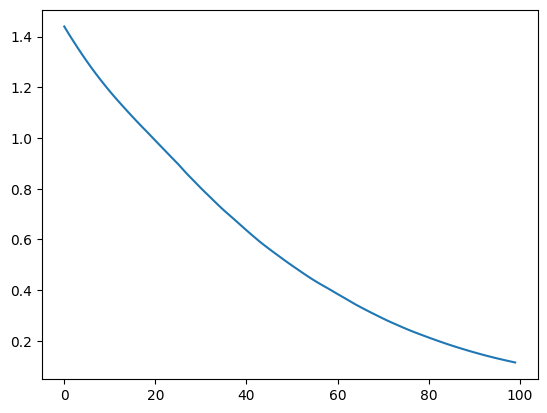

In [67]:
plt.plot(losses)
plt.show()

### 推論

In [68]:
x_pred = tf.constant(
    [
        [
            [1., 0., 0., 0., 0.],
            [1., 0., 0., 0., 0.],
            [1., 0., 0., 0., 0.],
            [1., 1., 0., 0., 1.],
            [1., 1., 1., 1., 1.],
        ],
        [
            [1., 1., 1., 1., 1.],
            [1., 1., 0., 0., 1.],
            [1., 0., 0., 0., 1.],
            [1., 0., 0., 1., 1.],
            [1., 1., 1., 1., 1.],
        ],
        [
            [1., 0., 0., 0., 1.],
            [1., 0., 0., 0., 1.],
            [1., 0., 0., 0., 1.],
            [0., 1., 1., 1., 0.],
            [0., 0., 1., 0., 0.],
        ],
        [
            [1., 1., 1., 1., 1.],
            [1., 0., 0., 0., 0.],
            [1., 1., 1., 1., 0.],
            [1., 0., 0., 0., 0.],
            [1., 1., 1., 1., 1.],
        ],
    ]
)

In [69]:
y_pred = model(x_pred, training=False)
[classes[y] for y in tf.math.argmax(y_pred, axis=1).numpy()]

['L', 'O', 'V', 'E']